In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Metrics 
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

# Model Selection & Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space  import Real, Categorical, Integer


# Clustering
from sklearn.cluster import KMeans

# Mathematical Functions
import math

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [4]:
train_df.head(8)

Dates        Category                        Descript  \
0  2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE        0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE        AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE   KIRKWOOD AV / DONAHUE ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541  
5 -122.403252  37.713431  
6 -122.423327  37.725138  
7 -122.371274  37.727564

In [5]:
train_df.columns.values

array(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'], dtype=object)

In [6]:
train_df.info(verbose=True, null_counts=True)

C:\Users\Manasa\AppData\Local\Temp\ipykernel_36796\276674373.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  train_df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [7]:
train_df['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [8]:
train_df['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [9]:
train_df['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [10]:
train_df['Resolution'].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [11]:
train_df[['X','Y']].describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [12]:
train_df[train_df['Y'] == train_df['Y'].max()]

Dates               Category  \
660485  2005-12-30 17:00:00          LARCENY/THEFT   
660711  2005-12-30 00:34:00                ASSAULT   
660712  2005-12-30 00:34:00                ASSAULT   
661106  2005-12-29 00:07:00           NON-CRIMINAL   
666430  2005-11-30 11:25:00         OTHER OFFENSES   
...                     ...                    ...   
844995  2003-06-11 08:49:00         OTHER OFFENSES   
845842  2003-06-09 09:25:00         OTHER OFFENSES   
852880  2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248  2003-04-14 16:30:00                ROBBERY   
871198  2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                      TRAFFIC VIOLATION  Wednesday  TENDERLOIN   
...                                       ...        ...         ...   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday   INGLESIDE   
845842  DRIVERS LICENSE, SUSPENDED OR REVOKED     Monday   INGLESIDE   
852880            FORCIBLE RAPE, BODILY FORCE     Friday    SOUTHERN   
857248       ROBBERY ON THE STREET, STRONGARM     Monday     BAYVIEW   
871198           PETTY THEFT FROM LOCKED AUTO  Wednesday    SOUTHERN   

                              Resolution  \
660485                              NONE   
660711                    ARREST, BOOKED   
660712                    ARREST, BOOKED   
661106                 PSYCHOPATHIC CASE   
666430                     ARREST, CITED   
...                                  ...   
844995                     ARREST, CITED   
845842                     ARREST, CITED   
852880  COMPLAINANT REFUSES TO PROSECUTE   
857248  COMPLAINANT REFUSES TO PROSECUTE   
871198                              NONE   

                                        Address      X     Y  
660485              5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106                  5THSTNORTH ST / EDDY ST -120.5  90.0  
666430                 5THSTNORTH ST / ELLIS ST -120.5  90.0  
...                                         ...    ...   ...  
844995  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
845842  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
852880           3RD ST / JAMES LICK FREEWAY HY -120.5  90.0  
857248                     GILMAN AV / FITCH ST -120.5  90.0  
871198      SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  

[67 rows x 9 columns]

In [13]:
train_df['Y'].replace(to_replace= train_df['Y'].max() ,value=np.nan, inplace=True)
train_df['X'].replace(to_replace= train_df['X'].max() ,value=np.nan, inplace=True)
test_df['Y'].replace(to_replace= test_df['Y'].max() ,value=np.nan, inplace=True)
test_df['X'].replace(to_replace= test_df['X'].max() ,value=np.nan, inplace=True)

In [14]:
train_df.isnull().sum()

Dates          0
Category       0
Descript       0
DayOfWeek      0
PdDistrict     0
Resolution     0
Address        0
X             67
Y             67
dtype: int64

In [15]:
test_df.isnull().sum()

Id             0
Dates          0
DayOfWeek      0
PdDistrict     0
Address        0
X             76
Y             76
dtype: int64

In [16]:
data = [train_df, test_df]

for dataset in data:
    mean_X = dataset["X"].mean()
    std_X = dataset["X"].std()
    mean_Y = dataset["Y"].mean()
    std_Y = dataset["Y"].std()
    max_X = mean_X + std_X
    min_X = mean_X - std_X
    max_Y = mean_Y + std_Y
    min_Y = mean_Y - std_Y
    is_null = dataset['Y'].isnull().sum()
    random_X = (max_X - min_X) * np.random.randn(is_null) + min_X
    random_Y = (max_Y - min_Y) * np.random.randn(is_null) + min_Y

    X_slice = dataset['X'].copy()
    Y_slice = dataset['Y'].copy()
    X_slice[np.isnan(X_slice)] = random_X
    Y_slice[np.isnan(Y_slice)] = random_Y
    dataset['X'] = X_slice
    dataset['Y'] = Y_slice
    

In [17]:
train_df[['X', 'Y']].describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422766      37.767032
std         0.025289       0.024169
min      -122.626058      37.624306
25%      -122.432952      37.752427
50%      -122.416422      37.775421
75%      -122.406959      37.784368
max      -122.334420      37.853950

In [18]:
len(train_df)

878049

In [19]:
test_df[['X', 'Y']].describe()

X              Y
count  884262.000000  884262.000000
mean     -122.422860      37.766985
std         0.025349       0.024183
min      -122.563840      37.660292
25%      -122.433075      37.752357
50%      -122.416517      37.775421
75%      -122.406959      37.784353
max      -122.309465      37.893711

In [20]:
len(test_df)

884262

In [21]:
train_df["Dates"] = pd.to_datetime(train_df["Dates"], format="%Y-%m-%d %H:%M:%S")
test_df["Dates"] = pd.to_datetime(test_df["Dates"], format="%Y-%m-%d %H:%M:%S")

In [22]:
# Minute
train_df["Minute"] = train_df["Dates"].map(lambda x: x.minute)
test_df["Minute"] = test_df["Dates"].map(lambda x: x.minute)

In [23]:
train_df["Hour"] = train_df["Dates"].map(lambda x: x.hour)
test_df["Hour"] = test_df["Dates"].map(lambda x: x.hour)

In [24]:
train_df["Day"] = train_df["Dates"].map(lambda x: x.day)
test_df["Day"] = test_df["Dates"].map(lambda x: x.day)

In [25]:
train_df["Month"] = train_df["Dates"].map(lambda x: x.month)
test_df["Month"] = test_df["Dates"].map(lambda x: x.month)

In [26]:
train_df["Year"] = train_df["Dates"].map(lambda x: x.year)
test_df["Year"] = test_df["Dates"].map(lambda x: x.year)

In [27]:
def get_hour_zone(hour):
    if hour >= 2 and hour < 8: 
        return 0
    elif hour >= 8 and hour < 12: 
        return 1
    elif hour >= 12 and hour < 18: 
        return 2
    elif hour >= 18 and hour < 22: 
        return 3
    elif hour < 2 or hour >= 22: 
        return 4
    
train_df["Hour_Zone"] = train_df["Hour"].map(get_hour_zone)
test_df["Hour_Zone"] = test_df["Hour"].map(get_hour_zone)

In [28]:
train_df["WeekOfYear"] = train_df["Dates"].map(lambda x: int(x.weekofyear / 2) - 1)
test_df["WeekOfYear"] = test_df["Dates"].map(lambda x: int(x.weekofyear / 2))

print(sorted(train_df['WeekOfYear'].unique()))
print(sorted(test_df['WeekOfYear'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [29]:
train_df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year  Hour_Zone  \
0 -122.425892  37.774599      53    23   13      5  2015          4   
1 -122.425892  37.774599      53    23   13      5  2015          4   
2 -122.424363  37.800414      33    23   13      5  2015          4   
3 -122.426995  37.800873      30    23   13      5  2015          4   
4 -122.438738  37.771541      30    23   13      5  2015          4   

   WeekOfYear  
0           9  
1           9  
2           9  
3           9  
4           9

In [30]:
# holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Training set
cal = calendar()
holidays = cal.holidays(start=train_df['Dates'].min(), end=train_df['Dates'].max())
train_df['Holiday'] = train_df['Dates'].dt.date.astype('datetime64').isin(holidays)

In [31]:
cal = calendar()
holidays = cal.holidays(start=test_df['Dates'].min(), end=test_df['Dates'].max())
test_df['Holiday'] = test_df['Dates'].dt.date.astype('datetime64').isin(holidays)

In [32]:
len(train_df[train_df['Holiday'] == True])

25653

In [33]:
len(test_df[test_df['Holiday'] == True])

18316

In [34]:
from datetime import datetime, time

def time_in_range(start, end, x):
    """Return true if x is in the inclusive range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

def map_business_hours(date):
    
    # Convert military time to AM & PM
    time_parsed = date.time()
    business_start = time(8, 0, 0)
    business_end = time(18, 0, 0)
    
    if time_in_range(business_start, business_end, time_parsed):
        return 1
    else:
        return 0
    
train_df['BusinessHour'] = train_df['Dates'].map(map_business_hours).astype('uint8')
test_df['BusinessHour'] = test_df['Dates'].map(map_business_hours).astype('uint8')

### Business hours considered
- 1 -> 08:00am - 06:00pm
- 0 -> 06:01pm - 07:59am

In [35]:
train_df['BusinessHour'].value_counts()

1    455215
0    422834
Name: BusinessHour, dtype: int64

In [36]:
train_df.head(10)

Dates        Category                        Descript  \
0 2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
8 2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
9 2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                        Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE       1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE      100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE            0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE            AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE       KIRKWOOD AV / DONAHUE ST   
8  Wednesday   RICHMOND            NONE           600 Block of 47TH AV   
9  Wednesday    CENTRAL            NONE  JEFFERSON ST / LEAVENWORTH ST   

            X          Y  Minute  Hour  Day  Month  Year  Hour_Zone  \
0 -122.425892  37.774599      53    23   13      5  2015          4   
1 -122.425892  37.774599      53    23   13      5  2015          4   
2 -122.424363  37.800414      33    23   13      5  2015          4   
3 -122.426995  37.800873      30    23   13      5  2015          4   
4 -122.438738  37.771541      30    23   13      5  2015          4   
5 -122.403252  37.713431      30    23   13      5  2015          4   
6 -122.423327  37.725138      30    23   13      5  2015          4   
7 -122.371274  37.727564      30    23   13      5  2015          4   
8 -122.508194  37.776601       0    23   13      5  2015          4   
9 -122.419088  37.807802       0    23   13      5  2015          4   

   WeekOfYear  Holiday  BusinessHour  
0           9    False             0  
1           9    False             0  
2           9    False             0  
3           9    False             0  
4           9    False             0  
5           9    False             0  
6           9    False             0  
7           9    False             0  
8           9    False             0  
9           9    False             0

# Season feature
- 1 for winter
- 2 for Spring
- 3 for Summer
- 4 for fall

In [37]:
train_df['Season']=(train_df['Month']%12 + 3)//3
test_df['Season']=(test_df['Month']%12 + 3)//3

In [38]:
train_df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year  Hour_Zone  \
0 -122.425892  37.774599      53    23   13      5  2015          4   
1 -122.425892  37.774599      53    23   13      5  2015          4   
2 -122.424363  37.800414      33    23   13      5  2015          4   
3 -122.426995  37.800873      30    23   13      5  2015          4   
4 -122.438738  37.771541      30    23   13      5  2015          4   

   WeekOfYear  Holiday  BusinessHour  Season  
0           9    False             0       2  
1           9    False             0       2  
2           9    False             0       2  
3           9    False             0       2  
4           9    False             0       2

# Weekend
- Weekday for 0
- Weekend for 1

In [39]:
days = {'Monday':0 ,'Tuesday':0 ,'Wednesday':0 ,'Thursday':0 ,'Friday':0, 'Saturday':1 ,'Sunday':1}

train_df['Weekend'] = train_df['DayOfWeek'].replace(days).astype('uint8')
test_df['Weekend'] = test_df['DayOfWeek'].replace(days).astype('uint8')

## Spatial Features

### Street type

 Address may affect the crime and let us know some of the patterns, whether the crime is happening in particular place repeatedly.

In [40]:
train_df['Address'].value_counts().index

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST', '0 Block of TURK ST', '0 Block of 6TH ST',
       '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       '16TH ST / MISSION ST',
       ...
       '5TH AV / CALIFORNIA ST', 'HAZELWOOD AV / YERBABUENA AV',
       '0 Block of TROY AL', '900 Block of MARTIN LUTHER KING JR DR',
       'CLIPPER ST / PORTOLA DR', 'PRECITA AV / CESAR CHAVEZ ST',
       '0 Block of COLUSA PL', '2800 Block of KEITH ST',
       'CABRILLO ST / ARGUELLO BL', 'OFARRELL ST / CYRIL MAGNIN ST'],
      dtype='object', length=23228)

In [41]:
import re

    
def find_streets(address):
    street_types = ['AV', 'ST', 'CT', 'PZ', 'LN', 'DR', 'PL', 'HY', 
                    'FY', 'WY', 'TR', 'RD', 'BL', 'WAY', 'CR', 'AL', 'I-80',  
                    'RW', 'WK','EL CAMINO DEL MAR']
    street_pattern = '|'.join(street_types)
    streets = re.findall(street_pattern, address)
    if len(streets) == 0:
        # Debug
#         print(address)
        return 'OTHER'
    elif len(streets) == 1:
        return streets[0]
    else:
#         print(address)
        return 'INT'

train_df['StreetType'] = train_df['Address'].map(find_streets)
test_df['StreetType'] = test_df['Address'].map(find_streets)

In [42]:
train_df['StreetType'].value_counts()

INT                  389995
ST                   358797
AV                    92467
BL                    13074
DR                     8200
WY                     4063
RD                     2384
PZ                     2347
CT                     2059
LN                     1356
PL                      863
HY                      819
TR                      766
I-80                    322
CR                      291
AL                      150
WAY                      55
EL CAMINO DEL MAR        21
OTHER                    14
WK                        5
RW                        1
Name: StreetType, dtype: int64

In [43]:
train_df['StreetType'].isnull().sum()

0

In [44]:
train_df.head(8)

Dates        Category                        Descript  \
0 2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE        0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE        AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE   KIRKWOOD AV / DONAHUE ST   

            X          Y  Minute  ...  Day  Month  Year  Hour_Zone  \
0 -122.425892  37.774599      53  ...   13      5  2015          4   
1 -122.425892  37.774599      53  ...   13      5  2015          4   
2 -122.424363  37.800414      33  ...   13      5  2015          4   
3 -122.426995  37.800873      30  ...   13      5  2015          4   
4 -122.438738  37.771541      30  ...   13      5  2015          4   
5 -122.403252  37.713431      30  ...   13      5  2015          4   
6 -122.423327  37.725138      30  ...   13      5  2015          4   
7 -122.371274  37.727564      30  ...   13      5  2015          4   

   WeekOfYear  Holiday  BusinessHour  Season  Weekend  StreetType  
0           9    False             0       2        0         INT  
1           9    False             0       2        0         INT  
2           9    False             0       2        0         INT  
3           9    False             0       2        0         INT  
4           9    False             0       2        0          ST  
5           9    False             0       2        0          AV  
6           9    False             0       2        0         INT  
7           9    False             0       2        0         INT  

[8 rows x 21 columns]

In [45]:
def find_block_number(address):
    block_num_pattern = '[0-9]+\s[Block]'
    block_num = re.search(block_num_pattern, address)
    if block_num:
#         print(address)
        num_pattern = '[0-9]+'
        block_no_pos = re.search(num_pattern, address)
        # Get integer of found regular expression
        block_no = int(block_no_pos.group())
        # Convert block number by dividing by 100 and adding 1 (0 = addresses with no block)
        block_map = (block_no // 100) + 1
#         print(block_map)
        return block_map
    else:
#         print(address)
        # 
        return 0


train_df['BlockNo'] = train_df['Address'].map(find_block_number)
test_df['BlockNo'] = test_df['Address'].map(find_block_number)

In [46]:
train_df['BlockNo'].value_counts()

0     260818
1      76325
2      51917
9      51718
3      38407
       ...  
82         7
79         5
81         4
84         4
80         3
Name: BlockNo, Length: 85, dtype: int64

In [47]:
# Normalize X and Y
print('There are %d unique longitude values, %d unique latitude values' % (train_df['X'].nunique(), 
                                                                           train_df['Y'].nunique()))

xy_scaler = StandardScaler().fit(train_df[['X', 'Y']])
train_df[['X', 'Y']] = xy_scaler.transform(train_df[['X', 'Y']])
test_df[['X', 'Y']] = xy_scaler.transform(test_df[['X', 'Y']])

There are 34309 unique longitude values, 34309 unique latitude values


In [48]:
cos_30 = math.cos(math.radians(30))
sin_30 = math.sin(math.radians(30))
cos_45 = math.cos(math.radians(45))
sin_45 = math.sin(math.radians(45))
cos_60 = math.cos(math.radians(60))
sin_60 = math.sin(math.radians(60))


train_df["Rot30_X"] = train_df['X'] * cos_30 - train_df['Y'] * sin_30 
train_df["Rot30_Y"] = train_df['X'] * sin_30 + train_df['Y'] * cos_30
train_df["Rot45_X"] = train_df['X'] * cos_45 - train_df['Y'] * sin_45  
train_df["Rot45_Y"] = train_df['X'] * sin_45 + train_df['Y'] * cos_45
train_df["Rot60_X"] = train_df['X'] * cos_60 - train_df['Y'] * sin_60  
train_df["Rot60_Y"] = train_df['X'] * sin_60 + train_df['Y'] * cos_60
train_df["Radius"] = np.sqrt(train_df['X'] ** 2 + train_df['Y'] ** 2)
train_df["Angle"] = np.arctan2(train_df['X'], train_df['Y'])

test_df["Rot30_X"] = test_df['X'] * cos_30 - test_df['Y'] * sin_30  
test_df["Rot30_Y"] = test_df['X'] * sin_30 + test_df['Y'] * cos_30
test_df["Rot45_X"] = test_df['X'] * cos_45 - test_df['Y'] * sin_45  
test_df["Rot45_Y"] = test_df['X'] * sin_45 + test_df['Y'] * cos_45
test_df["Rot60_X"] = test_df['X'] * cos_60 - test_df['Y'] * sin_60  
test_df["Rot60_Y"] = test_df['X'] * sin_60 + test_df['Y'] * cos_60
test_df["Radius"] = np.sqrt(test_df['X'] ** 2 + test_df['Y'] ** 2)
test_df["Angle"] = np.arctan2(test_df['X'], test_df['Y'])

In [49]:
train_df.describe()

X             Y         Minute           Hour  \
count  8.780490e+05  8.780490e+05  878049.000000  878049.000000   
mean   3.501236e-13  2.895915e-13      20.155026      13.412655   
std    1.000001e+00  1.000001e+00      18.594915       6.549573   
min   -8.038783e+00 -5.905355e+00       0.000000       0.000000   
25%   -4.027862e-01 -6.042905e-01       0.000000       9.000000   
50%    2.508528e-01  3.470661e-01      19.000000      14.000000   
75%    6.250495e-01  7.172509e-01      33.000000      19.000000   
max    3.493420e+00  3.596224e+00      59.000000      23.000000   

                 Day          Month           Year      Hour_Zone  \
count  878049.000000  878049.000000  878049.000000  878049.000000   
mean       15.570623       6.436509    2008.712046       2.212740   
std         8.783005       3.428972       3.631194       1.214321   
min         1.000000       1.000000    2003.000000       0.000000   
25%         8.000000       3.000000    2006.000000       1.000000   
50%        16.000000       6.000000    2009.000000       2.000000   
75%        23.000000       9.000000    2012.000000       3.000000   
max        31.000000      12.000000    2015.000000       4.000000   

          WeekOfYear   BusinessHour  ...        Weekend        BlockNo  \
count  878049.000000  878049.000000  ...  878049.000000  878049.000000   
mean       12.185458       0.518439  ...       0.277339       7.743576   
std         7.482940       0.499660  ...       0.447685      10.233725   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         6.000000       0.000000  ...       0.000000       0.000000   
50%        12.000000       1.000000  ...       0.000000       4.000000   
75%        19.000000       1.000000  ...       1.000000      11.000000   
max        25.000000       1.000000  ...       1.000000      84.000000   

            Rot30_X       Rot30_Y       Rot45_X       Rot45_Y       Rot60_X  \
count  8.780490e+05  8.780490e+05  8.780490e+05  8.780490e+05  8.780490e+05   
mean   1.584180e-13  4.258533e-13  4.280297e-14  4.523452e-13 -7.573273e-14   
std    9.308204e-01  1.064695e+00  9.196535e-01  1.074355e+00  9.308204e-01   
min   -5.122207e+00 -8.076086e+00 -4.510864e+00 -8.634439e+00 -3.943299e+00   
25%   -4.145353e-01 -5.663634e-01 -4.910060e-01 -5.401420e-01 -5.843869e-01   
50%    6.285552e-02  2.143232e-01 -9.702556e-02  2.240091e-01 -2.372977e-01   
75%    4.804400e-01  8.071702e-01  4.085261e-01  7.867594e-01  5.062749e-01   
max    4.853412e+00  3.679847e+00  5.727660e+00  3.729323e+00  6.211577e+00   

            Rot60_Y         Radius          Angle  
count  8.780490e+05  878049.000000  878049.000000  
mean   4.480100e-13       1.219251       0.278840  
std    1.064695e+00       0.716539       1.652411  
min   -8.801374e+00       0.020050      -3.141586  
25%   -4.588468e-01       0.742423      -1.065636  
50%    3.121957e-01       1.003647       0.508767  
75%    7.512160e-01       1.639540       1.172383  
max    3.524652e+00       8.840719       3.141162  

[8 rows x 21 columns]

In [50]:
data = [train_df, test_df]
num_clusters = 40
for dataset in data:
    coordinates = dataset.loc[:,['Y','X']]
    kmeans = KMeans(n_clusters=num_clusters, random_state=1).fit(coordinates)
    id_labels=kmeans.labels_
#     print(kmeans.cluster_centers_)
    dataset['Cluster'] = id_labels

C:\Users\Manasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
train_df.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address         X  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -0.123617   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -0.123617   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -0.063169   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST -0.167258   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST -0.631583   

          Y  Minute  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0  0.313051      53  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1  0.313051      53  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2  1.381185      33  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3  1.400148      30  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4  0.186549      30  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 31 columns]

In [52]:
train_df.drop(['Address'], axis=1, inplace=True)
test_df.drop(['Address'], axis=1, inplace=True)

In [53]:
train_df.drop(['Dates'], axis=1, inplace=True)
test_df.drop(['Dates'], axis=1, inplace=True)

In [54]:
train_df.drop(['Resolution'], axis=1, inplace=True)

In [55]:
train_df.drop(['Descript'], axis=1, inplace=True)

In [56]:
train_df.head()

Category  DayOfWeek PdDistrict         X         Y  Minute  Hour  \
0        WARRANTS  Wednesday   NORTHERN -0.123617  0.313051      53    23   
1  OTHER OFFENSES  Wednesday   NORTHERN -0.123617  0.313051      53    23   
2  OTHER OFFENSES  Wednesday   NORTHERN -0.063169  1.381185      33    23   
3   LARCENY/THEFT  Wednesday   NORTHERN -0.167258  1.400148      30    23   
4   LARCENY/THEFT  Wednesday       PARK -0.631583  0.186549      30    23   

   Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0   13      5  2015  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1   13      5  2015  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2   13      5  2015  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3   13      5  2015  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4   13      5  2015  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [57]:
# Feature encoding(converting pd idstrict categorical feature to numeric)

pd_districts = {'SOUTHERN':0, 'MISSION':1, 'NORTHERN':2, 'CENTRAL':3, 'BAYVIEW':4, 'INGLESIDE':5, 
                'TENDERLOIN':6, 'TARAVAL':7, 'PARK':8, 'RICHMOND':9}

train_df['PdDistrict'].replace(pd_districts, inplace=True)
test_df['PdDistrict'].replace(pd_districts, inplace=True)

In [58]:
train_df.head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  Hour  \
0        WARRANTS  Wednesday           2 -0.123617  0.313051      53    23   
1  OTHER OFFENSES  Wednesday           2 -0.123617  0.313051      53    23   
2  OTHER OFFENSES  Wednesday           2 -0.063169  1.381185      33    23   
3   LARCENY/THEFT  Wednesday           2 -0.167258  1.400148      30    23   
4   LARCENY/THEFT  Wednesday           8 -0.631583  0.186549      30    23   

   Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0   13      5  2015  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1   13      5  2015  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2   13      5  2015  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3   13      5  2015  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4   13      5  2015  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  object 
 1   DayOfWeek     878049 non-null  object 
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  bool   
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  object 
 17  BlockNo       878049 non-null  int64  
 18  Rot3

In [60]:
data = [train_df, test_df]

for dataset in data:
    year_le = LabelEncoder()
    year_le.fit(dataset['Year'].unique())
    print(list(year_le.classes_))

    dataset['Year']=year_le.transform(dataset['Year']) 

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [61]:
train_df['Year'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

In [62]:
dict(zip(year_le.classes_, year_le.transform(year_le.classes_)))

{2003: 0,
 2004: 1,
 2005: 2,
 2006: 3,
 2007: 4,
 2008: 5,
 2009: 6,
 2010: 7,
 2011: 8,
 2012: 9,
 2013: 10,
 2014: 11,
 2015: 12}

In [63]:
train_df.head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  Hour  \
0        WARRANTS  Wednesday           2 -0.123617  0.313051      53    23   
1  OTHER OFFENSES  Wednesday           2 -0.123617  0.313051      53    23   
2  OTHER OFFENSES  Wednesday           2 -0.063169  1.381185      33    23   
3   LARCENY/THEFT  Wednesday           2 -0.167258  1.400148      30    23   
4   LARCENY/THEFT  Wednesday           8 -0.631583  0.186549      30    23   

   Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2   13      5    12  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3   13      5    12  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4   13      5    12  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  object 
 1   DayOfWeek     878049 non-null  object 
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  bool   
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  object 
 17  BlockNo       878049 non-null  int64  
 18  Rot3

In [65]:
data = [train_df, test_df]

for dataset in data:
    dow_le = LabelEncoder()
    dow_le.fit(dataset['DayOfWeek'].unique())
    print(list(dow_le.classes_))
    dataset['DayOfWeek']=dow_le.transform(dataset['DayOfWeek'])

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [66]:
train_df['DayOfWeek'].unique()

array([6, 5, 1, 3, 2, 0, 4])

In [67]:
dict(zip(dow_le.classes_, dow_le.transform(dow_le.classes_)))

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [68]:
train_df.head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  Hour  \
0        WARRANTS          6           2 -0.123617  0.313051      53    23   
1  OTHER OFFENSES          6           2 -0.123617  0.313051      53    23   
2  OTHER OFFENSES          6           2 -0.063169  1.381185      33    23   
3   LARCENY/THEFT          6           2 -0.167258  1.400148      30    23   
4   LARCENY/THEFT          6           8 -0.631583  0.186549      30    23   

   Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2   13      5    12  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3   13      5    12  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4   13      5    12  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  object 
 1   DayOfWeek     878049 non-null  int32  
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  bool   
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  object 
 17  BlockNo       878049 non-null  int64  
 18  Rot3

#### Encoding the categorical data to numeric using sklearn's LabelEncoder

In [70]:
data = [train_df, test_df]

for dataset in data:
    st_le = LabelEncoder()
    st_le.fit(dataset['StreetType'].unique())
    print(list(st_le.classes_))
    dataset['StreetType']=st_le.transform(dataset['StreetType'])

['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']
['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']


In [71]:
train_df['StreetType'].unique()

array([ 9, 16,  1, 20,  4,  5, 17,  7, 14, 13,  2, 12, 10, 18,  3,  0, 11,
       19, 15,  6,  8])

In [72]:
train_df.head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  Hour  \
0        WARRANTS          6           2 -0.123617  0.313051      53    23   
1  OTHER OFFENSES          6           2 -0.123617  0.313051      53    23   
2  OTHER OFFENSES          6           2 -0.063169  1.381185      33    23   
3   LARCENY/THEFT          6           2 -0.167258  1.400148      30    23   
4   LARCENY/THEFT          6           8 -0.631583  0.186549      30    23   

   Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1   13      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2   13      5    12  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3   13      5    12  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4   13      5    12  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  object 
 1   DayOfWeek     878049 non-null  int32  
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  bool   
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  int32  
 17  BlockNo       878049 non-null  int64  
 18  Rot3

In [74]:
# encode bool to 0 and 1 for holiday feature
train_df['Holiday'].replace(False, 0, inplace=True)
train_df['Holiday'].replace(True, 1, inplace=True)
test_df['Holiday'].replace(False, 0, inplace=True)
test_df['Holiday'].replace(True, 1, inplace=True)

train_df['Holiday'] = train_df['Holiday'].astype('uint8')
train_df['Holiday'] = train_df['Holiday'].astype('uint8')

In [75]:
train_df[train_df['Holiday'] == 1].head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  \
18357   DRUG/NARCOTIC          1           0  0.765580  0.347066      48   
18358  OTHER OFFENSES          1           0  0.765580  0.347066      48   
18359    NON-CRIMINAL          1           5  0.436378 -2.363386      30   
18360       VANDALISM          1           3  0.281652  1.685218      30   
18361   LARCENY/THEFT          1           2 -0.250880  0.118597      30   

       Hour  Day  Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X  \
18357    23   16      2    12  ...        9  0.489479  0.683358  0.295934   
18358    23   16      2    12  ...        9  0.489479  0.683358  0.295934   
18359    23   16      2    12  ...        3  1.559607 -1.828563  1.979732   
18360    23   16      2    12  ...       28 -0.598691  1.600268 -0.992471   
18361    23   16      2    12  ...        1 -0.276567 -0.022732 -0.261259   

        Rot45_Y   Rot60_X   Rot60_Y    Radius     Angle  Cluster  
18357  0.786759  0.082222  0.836545  0.840576  1.145170       14  
18358  0.786759  0.082222  0.836545  0.840576  1.145170       14  
18359 -1.362601  2.264941 -0.803779  2.403335  2.959008       20  
18360  1.390788 -1.318616  1.086527  1.708593  0.165601       17  
18361 -0.093538 -0.228148 -0.157970  0.277499 -1.129207       36  

[5 rows x 27 columns]

In [76]:
test_df[test_df['Holiday'] == 1].head()

Id  DayOfWeek  PdDistrict         X         Y  Minute  Hour  Day  \
27957  27957          4           3  0.499757  1.574994      55    23    1   
27958  27958          4           6  0.192240  0.750326      43    23    1   
27959  27959          4           1 -0.121659 -0.265235      30    23    1   
27960  27960          4           7 -2.340966 -1.309850      15    23    1   
27961  27961          4           7 -2.340966 -1.309850      15    23    1   

       Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
27957      1    12  ...        0 -0.354695  1.613863 -0.760308  1.467070   
27958      1    12  ...        0 -0.208678  0.745921 -0.394626  0.666495   
27959      1    12  ...        6  0.027258 -0.290530  0.101524 -0.273575   
27960      1    12  ...        1 -1.372411 -2.304847 -0.729109 -2.581517   
27961      1    12  ...        1 -1.372411 -2.304847 -0.729109 -2.581517   

        Rot60_X   Rot60_Y    Radius     Angle  Cluster  
27957 -1.114106  1.220299  1.652381  0.307258       31  
27958 -0.553681  0.541648  0.774561  0.250814        1  
27959  0.168871 -0.237977  0.291806 -2.711541       16  
27960 -0.036119 -2.682261  2.682504 -2.080930       21  
27961 -0.036119 -2.682261  2.682504 -2.080930       21  

[5 rows x 27 columns]

### Category
encode from categorical data to numeric using LabelEncoder

In [77]:
data = [train_df]

for dataset in data:
    cat_le = LabelEncoder()
    cat_le.fit(dataset['Category'].unique())
    print(list(cat_le.classes_))
    dataset['Category']=cat_le.transform(dataset['Category'])

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


In [78]:
len(train_df['Category'].unique())

39

In [79]:
dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

{'ARSON': 0,
 'ASSAULT': 1,
 'BAD CHECKS': 2,
 'BRIBERY': 3,
 'BURGLARY': 4,
 'DISORDERLY CONDUCT': 5,
 'DRIVING UNDER THE INFLUENCE': 6,
 'DRUG/NARCOTIC': 7,
 'DRUNKENNESS': 8,
 'EMBEZZLEMENT': 9,
 'EXTORTION': 10,
 'FAMILY OFFENSES': 11,
 'FORGERY/COUNTERFEITING': 12,
 'FRAUD': 13,
 'GAMBLING': 14,
 'KIDNAPPING': 15,
 'LARCENY/THEFT': 16,
 'LIQUOR LAWS': 17,
 'LOITERING': 18,
 'MISSING PERSON': 19,
 'NON-CRIMINAL': 20,
 'OTHER OFFENSES': 21,
 'PORNOGRAPHY/OBSCENE MAT': 22,
 'PROSTITUTION': 23,
 'RECOVERED VEHICLE': 24,
 'ROBBERY': 25,
 'RUNAWAY': 26,
 'SECONDARY CODES': 27,
 'SEX OFFENSES FORCIBLE': 28,
 'SEX OFFENSES NON FORCIBLE': 29,
 'STOLEN PROPERTY': 30,
 'SUICIDE': 31,
 'SUSPICIOUS OCC': 32,
 'TREA': 33,
 'TRESPASS': 34,
 'VANDALISM': 35,
 'VEHICLE THEFT': 36,
 'WARRANTS': 37,
 'WEAPON LAWS': 38}

In [80]:
train_df.head()

Category  DayOfWeek  PdDistrict         X         Y  Minute  Hour  Day  \
0        37          6           2 -0.123617  0.313051      53    23   13   
1        21          6           2 -0.123617  0.313051      53    23   13   
2        21          6           2 -0.063169  1.381185      33    23   13   
3        16          6           2 -0.167258  1.400148      30    23   13   
4        16          6           8 -0.631583  0.186549      30    23   13   

   Month  Year  ...  BlockNo   Rot30_X   Rot30_Y   Rot45_X   Rot45_Y  \
0      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
1      5    12  ...        0 -0.263581  0.209302 -0.308771  0.133950   
2      5    12  ...        0 -0.745299  1.164557 -1.021313  0.931978   
3      5    12  ...       16 -0.844924  1.128935 -1.108324  0.871785   
4      5    12  ...        2 -0.640241 -0.154235 -0.578507 -0.314686   

    Rot60_X   Rot60_Y    Radius     Angle  Cluster  
0 -0.332918  0.049470  0.336574 -0.376082       27  
1 -0.332918  0.049470  0.336574 -0.376082       27  
2 -1.227726  0.635886  1.382629 -0.045704       39  
3 -1.296193  0.555224  1.410103 -0.118894       39  
4 -0.477348 -0.453692  0.658557 -1.283595       36  

[5 rows x 27 columns]

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  int32  
 1   DayOfWeek     878049 non-null  int32  
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  uint8  
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  int32  
 17  BlockNo       878049 non-null  int64  
 18  Rot3

## Preprocessed Information about the data 

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  int32  
 1   DayOfWeek     878049 non-null  int32  
 2   PdDistrict    878049 non-null  int64  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int64  
 6   Hour          878049 non-null  int64  
 7   Day           878049 non-null  int64  
 8   Month         878049 non-null  int64  
 9   Year          878049 non-null  int64  
 10  Hour_Zone     878049 non-null  int64  
 11  WeekOfYear    878049 non-null  int64  
 12  Holiday       878049 non-null  uint8  
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int64  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  int32  
 17  BlockNo       878049 non-null  int64  
 18  Rot3

In [83]:
# to train faster all integers are converted to 32 bit as it doesn't affect the data(loss of data).

columns_to_convert = ['DayOfWeek', 'PdDistrict', 'Minute', 'Hour', 'Day', 'Month', 'Year', 
                      'Hour_Zone', 'WeekOfYear', 'Season', 'StreetType', 'BlockNo', 'Cluster']
train_df[columns_to_convert] = train_df[columns_to_convert].astype('int16')
test_df[columns_to_convert] = test_df[columns_to_convert].astype('int16')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      878049 non-null  int32  
 1   DayOfWeek     878049 non-null  int16  
 2   PdDistrict    878049 non-null  int16  
 3   X             878049 non-null  float64
 4   Y             878049 non-null  float64
 5   Minute        878049 non-null  int16  
 6   Hour          878049 non-null  int16  
 7   Day           878049 non-null  int16  
 8   Month         878049 non-null  int16  
 9   Year          878049 non-null  int16  
 10  Hour_Zone     878049 non-null  int16  
 11  WeekOfYear    878049 non-null  int16  
 12  Holiday       878049 non-null  uint8  
 13  BusinessHour  878049 non-null  uint8  
 14  Season        878049 non-null  int16  
 15  Weekend       878049 non-null  uint8  
 16  StreetType    878049 non-null  int16  
 17  BlockNo       878049 non-null  int16  
 18  Rot3

### Building ML models


In [84]:
# Set training data (drop labels) and training labels
X_train = train_df.drop("Category", axis=1).copy()
Y_train = train_df["Category"].copy()

# Set testing data (drop Id)
X_test = test_df.drop("Id", axis=1).copy()

In [85]:
def one_hot_encode(train_data):
    '''One Hot Encode the categorical features'''
    encoded_train_data = train_data

    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['PdDistrict']), prefix='PdDistrict')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['DayOfWeek']), prefix='DayOfWeek')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['StreetType']), prefix='StreetType')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Season']), prefix='Season')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Hour_Zone']), prefix='Hour_Zone')], axis=1)
    encoded_train_data = pd.concat([encoded_train_data, 
                                    pd.get_dummies(pd.Series(encoded_train_data['Cluster']), prefix='Cluster')], axis=1)
    encoded_train_data = encoded_train_data.drop(['Cluster','StreetType', 'Season', 'Hour_Zone', 'DayOfWeek', 'PdDistrict'], axis=1)

    return encoded_train_data

In [86]:
X_encoded_train = one_hot_encode(X_train)

In [95]:
mini_encoded_train_data, mini_encoded_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_encoded_train, 
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.5,
                                                                                      random_state=1)

In [96]:
mini_train_data, mini_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_train, 
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.5,
                                                                                      random_state=1)

In [122]:
#K neighbors
knn = KNeighborsClassifier()
knn.fit(mini_train_data, mini_train_labels)
pred_probs = knn.predict_proba(mini_dev_data)
knn_loss = log_loss(mini_dev_labels, pred_probs)


print('KNN Validation Log Loss: ', knn_loss)

KNN Validation Log Loss:  18.620049696319114


In [90]:

#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(mini_dev_labels, pred_probs)

#print('KNN Validation Accuracy: {:.2f}%'.format(accuracy * 100))

In [91]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(mini_train_data, mini_train_labels)
pred_probs = gaussian.predict_proba(mini_dev_data)
nb_loss = log_loss(mini_dev_labels, pred_probs)


print('Gaussian Naive Bayes Validation Log Loss: ', nb_loss)

Gaussian Naive Bayes Validation Log Loss:  3.9997889879753394


In [92]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(penalty='elasticnet', loss='log', 
                                  tol=0.0001, max_iter=1000, n_jobs=3, random_state=1)
sgd.fit(mini_encoded_train_data, mini_train_labels)
pred_probs = sgd.predict_proba(mini_encoded_dev_data)
# sgd.fit(one_hot_encode(mini_train_data), mini_train_labels)
# sgd = gaussian.predict_proba(one_hot_encode(mini_dev_data))
sgd_loss = log_loss(mini_dev_labels, pred_probs)

print('Linear Model SGD Validation Log Loss: ', sgd_loss)

C:\Users\Manasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Linear Model SGD Validation Log Loss:  2.57212695384151


In [ ]:
#logreg = LogisticRegression(penalty='l1', C=1.5, solver='saga', multi_class='multinomial', 
#                            tol=0.0001, max_iter=1000, verbose=3, n_jobs=3, random_state=1)

#logreg.fit(mini_encoded_train_data, mini_train_labels)
#pred_probs = logreg.predict_proba(mini_encoded_dev_data)

#logreg_loss = log_loss(mini_dev_labels, pred_probs)

#print('Logistic Regression Validation Log Loss: ', logreg_loss)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


In [114]:
# Random Forest Ensemble
random_forest = RandomForestClassifier(n_estimators=500, max_depth=15, max_features='sqrt',
                                       min_samples_leaf=5, min_samples_split=25, 
                                       random_state=1, verbose=1, n_jobs=5)


random_forest.fit(mini_train_data, mini_train_labels)
pred_probs = random_forest.predict_proba(mini_dev_data)

rf_loss = log_loss(mini_dev_labels, pred_probs)

print('Random Forest Validation Log Loss: ', rf_loss)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   46.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.7min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  8.2min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  9.2min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   43.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  1.7min finished


Random Forest Validation Log Loss:  2.2821074927383727


In [89]:
# XGBoost Ensemble 
# xgb = XGBClassifier(n_estimators=100, verbose=3, n_jobs=2, random_state=1)
xgb = XGBClassifier(n_estimators=50, objective="multi:softprob", n_jobs=5, random_state=1)

xgb.fit(mini_encoded_train_data, mini_train_labels)
pred_probs = xgb.predict_proba(mini_encoded_dev_data)

xgb_loss = log_loss(mini_dev_labels, pred_probs)

print('XGBoost Validation Log Loss: ', xgb_loss)  

XGBoost Validation Log Loss:  2.2678096887378723


In [89]:
xgb_loss = 2.2777614366851147
knn_loss = 18.698597355021857
sgd_loss = 2.5619104328415903
nb_loss = 3.9381918698371523
rf_loss = 2.283956496192948

In [90]:
# Display the rank of the models
models = pd.DataFrame({
    'Model': ['SGD (Elastic net)', 'Random Forest', 
              'Gaussian Naive Bayes', 'XGBoost', 'K Neighbors'],
    'Log_Loss': [sgd_loss, rf_loss, nb_loss, xgb_loss, knn_loss]})
print(models.sort_values(by='Log_Loss', ascending=True).reset_index(drop=True))

                  Model   Log_Loss
0               XGBoost   2.277761
1         Random Forest   2.283956
2     SGD (Elastic net)   2.561910
3  Gaussian Naive Bayes   3.938192
4           K Neighbors  18.698597


In [98]:
#explaining LIME interpretations for xgboost model
from lime.lime_tabular import LimeTabularExplainer
feature_names = X_encoded_train.columns
mini_encoded_train_data_np = mini_encoded_train_data.to_numpy()
explainer = LimeTabularExplainer(mini_encoded_train_data_np, mode="classification",training_labels = mini_train_labels,feature_names = feature_names)

In [111]:
instance_idx = 1
instance = mini_encoded_dev_data.iloc[instance_idx]

def xgb_predict_proba(data):
    return xgb.predict_proba(data)

exp = explainer.explain_instance(instance,xgb_predict_proba, num_features = len(instance), top_labels = 1)

exp.show_in_notebook()

In [144]:
#LIME interpretations for Random forest

mini_train_data_np = mini_train_data.to_numpy()
explainer1 = LimeTabularExplainer(mini_train_data_np, mode = "classification", training_labels = mini_train_labels, feature_names = mini_train_data.columns.tolist())

def rf_predict(data):
    return random_forest.predict_proba(data)

instance_to_explain = mini_dev_data.iloc[0]
instance_to_explain_np = instance_to_explain.to_numpy()
exp1 = explainer1.explain_instance(instance_to_explain_np, predict_fn = rf_predict, num_features = len(mini_train_data.columns))
exp1.show_in_notebook()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    4.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    8.8s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    9.2s finished


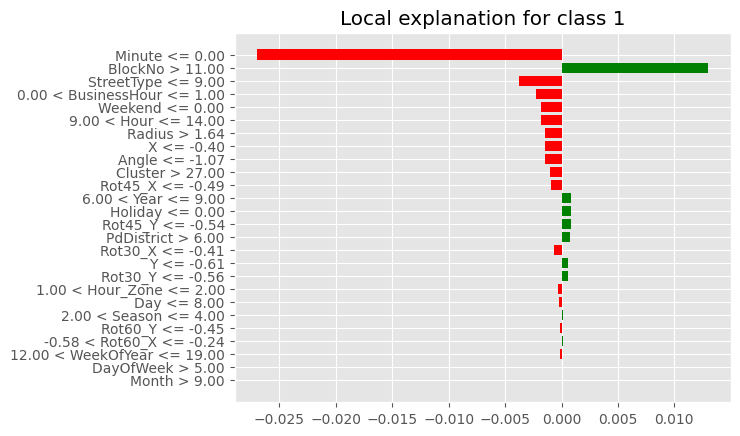

In [146]:
with plt.style.context("ggplot"):
    fig = exp1.as_pyplot_figure()
    plt.show()

In [ ]:
exp1.show_in_notebook()

In [ ]:
# Choose a smaller subset size
subset_size = 100

# Create a smaller subset for explanation
mini_dev_subset = mini_dev_data.head(subset_size)

# Generate SHAP values for the subset
shap_values_subset = explainer.shap_values(mini_dev_subset)
shap.summary_plot(shap_values_subset, mini_dev_subset)
# For example, visualize SHAP values for the first instance in the subset
shap.force_plot(explainer.expected_value[1], shap_values_subset[1][0, :], mini_dev_subset.iloc[0, :])




In [ ]:
#SHAP implementations for random forest

explainer2 = shap.TreeExplainer(random_forest)
shap_values = explainer2.shap_values(mini_dev_data)


In [ ]:
shap.summary_plot(shap_values, mini_dev_data, plot_type = "bar")

In [ ]:
# Visualize the SHAP values for a specific instance (e.g., the first instance)
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], mini_dev_data.iloc[0, :])


In [3]:
# with plt.style.context("ggplot"):
#     exp.as_pyplot_figure()

In [130]:

#LIME explanations for KNN model
mini_train_data_array = np.array(mini_train_data)
explainer = LimeTabularExplainer(mini_train_data_array, feature_names=[f'feature_{i}' for i in range(mini_train_data.shape[1])])
def knn_predict_proba(data):
    return knn.predict_proba(data)
instance_index = 0

instance_data = mini_train_data.iloc[[instance_index]]
instance_labels = mini_train_labels.iloc[[instance_index]]

selected_instance = instance_data.values.reshape(1,-1)
explanation = explainer.explain_instance(selected_instance.flatten(),knn.predict_proba,num_features = len(mini_train_data.columns))
explanation.show_in_notebook()


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [131]:
explanation.show_in_notebook()

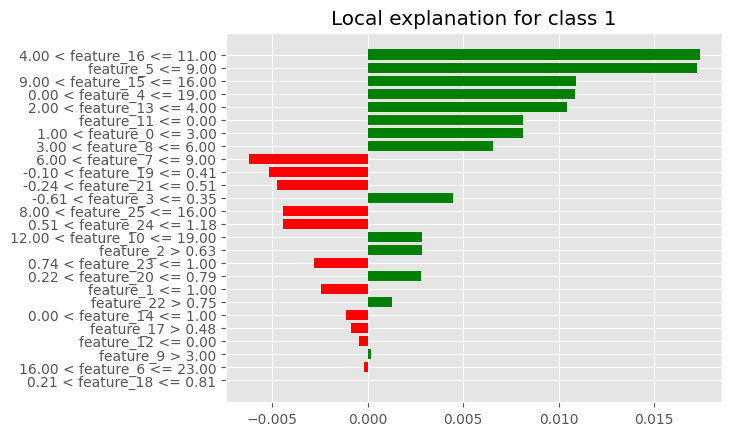

In [132]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

In [129]:
explainer = shap.KernelExplainer(knn.predict_proba, mini_train_data)


Using 439024 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [132]:
!pip install shap


You should consider upgrading via the 'C:\Users\Manasa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [134]:
#SHAP explanations for XGBoost model

import shap

explainer = shap.TreeExplainer(xgb)

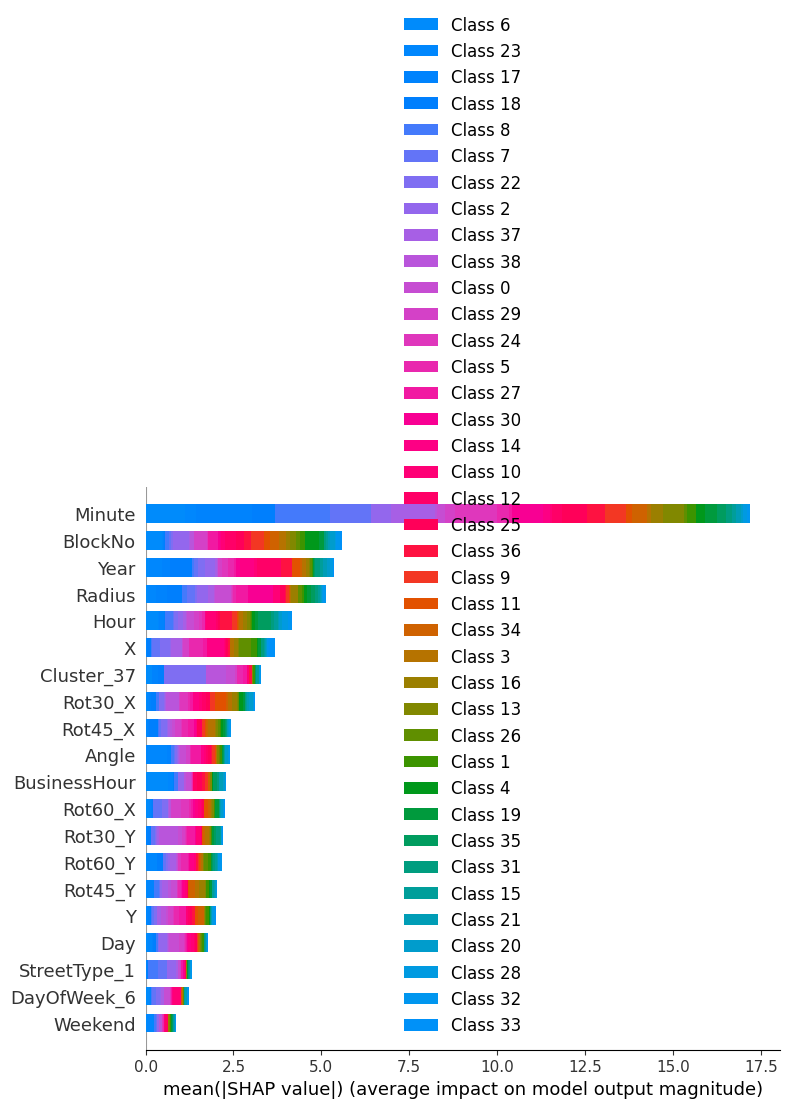

In [135]:
instance_index = 0
selected_instance_ = mini_encoded_dev_data.iloc[[instance_index]]
shap_values = explainer.shap_values(selected_instance_)

shap.summary_plot(shap_values, selected_instance_)

In [151]:
#force plot

#shap.force_plot(base_value = explainer.expected_value[0],shap_values = shap_values[0], features = selected_instance_,link = "logit",matplotlib = True)

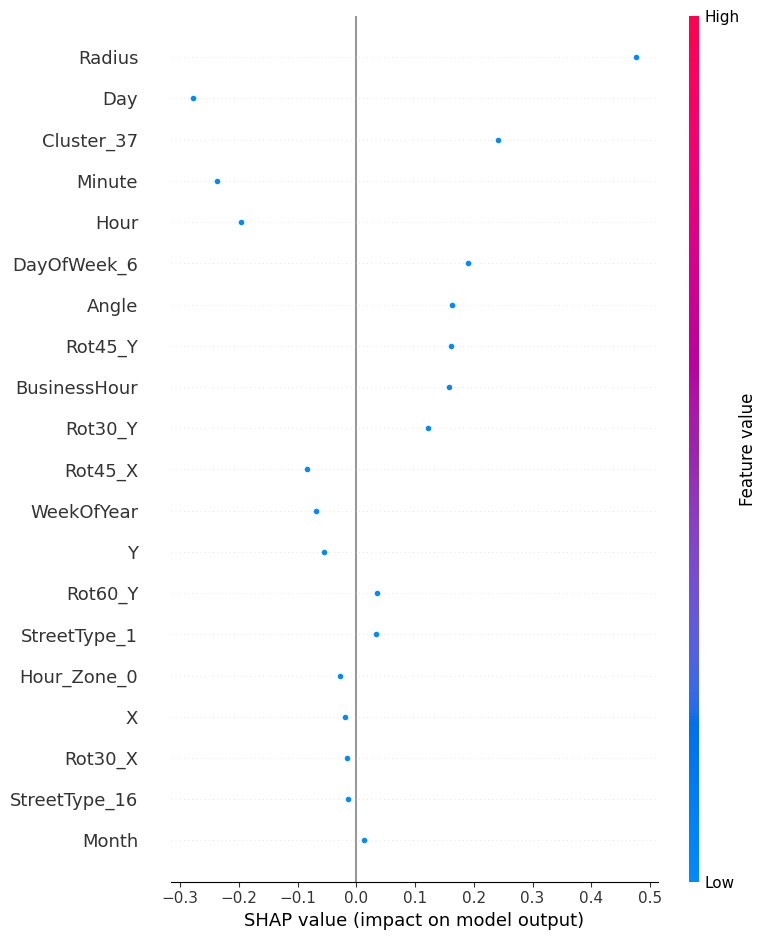

In [119]:
shap_values_label_0 = shap_values[0]
shap.summary_plot(shap_values_label_0, selected_instance_,show = False)
plt.show()

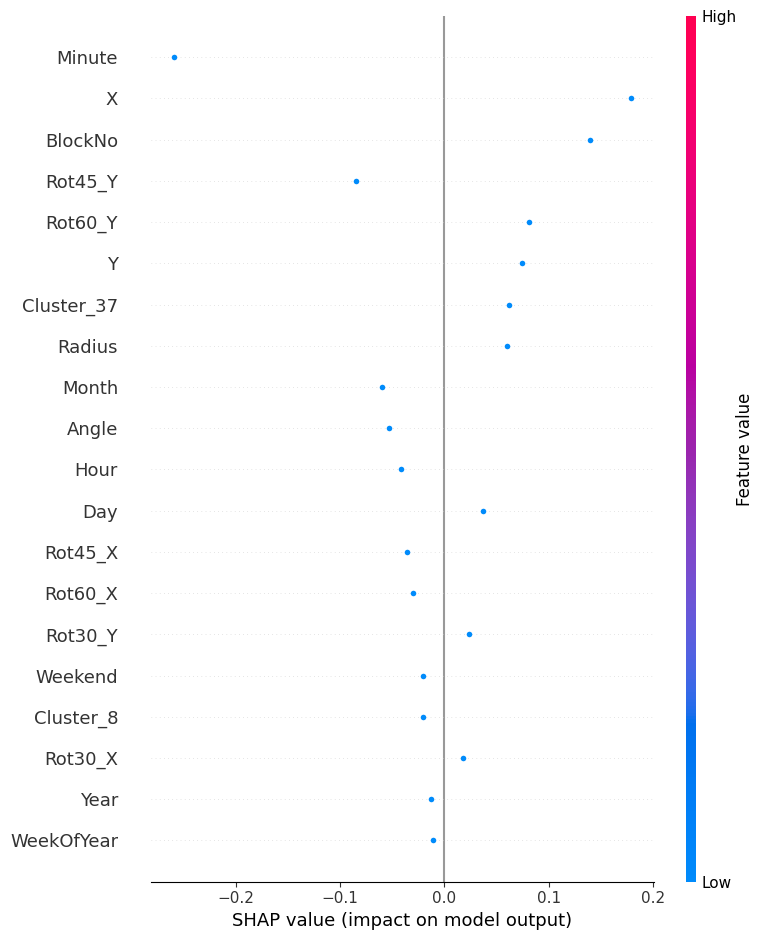

In [120]:
shap_values_label_1 = shap_values[1]
shap.summary_plot(shap_values_label_1, selected_instance_,show = False)
plt.show()

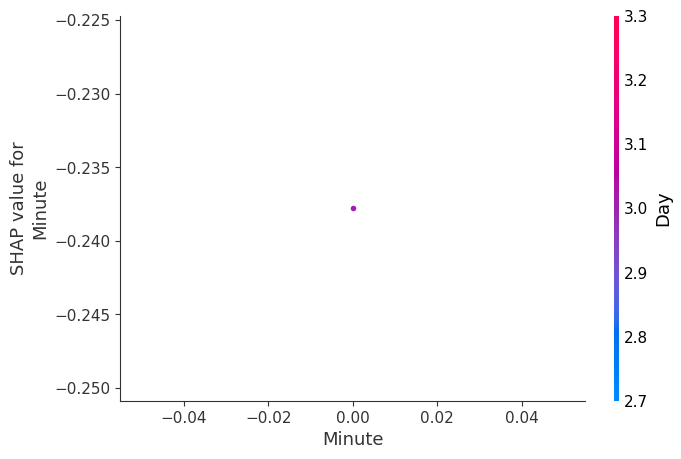

In [121]:
shap.dependence_plot(
    ind="Minute",
    shap_values=shap_values[0],  # Assuming you want to visualize for label 0
    features=selected_instance_,
    interaction_index="Day",
    show=True
)

In [ ]:
explainer = shap.KernelExplainer(knn.predict_proba, mini_train_data)


In [1]:
# instance_index1 = 0
# selected_instance1 = mini_dev_data.iloc[[instance_index1]]
# shap_values = explainer.shap_values(selected_instance1)
# shap.summary_plot(shap_vaues,selected_instance1)

In [92]:
n_features = X_train.shape[1]


opt = BayesSearchCV(
    estimator=RandomForestClassifier(oob_score=True, random_state=1, n_jobs=2),
    search_spaces= 
    {
        'n_estimators': (100, 600),
        'max_depth': (1, 50),  
        'max_features': (1, n_features),
        'min_samples_leaf': (1, 50),  # integer valued parameter
        'min_samples_split': (2, 50),
    },
    n_iter=20,
    optimizer_kwargs= {'base_estimator': 'RF'},
    scoring='neg_log_loss',
    n_jobs=5,
    verbose=0,
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=1
    ),
    random_state=1
    
)


def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(opt.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(opt.best_params_)
    print('Model #{}\nBest LogLoss: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(opt.best_score_, 6),
        opt.best_params_
    ))
    
    # Save all model results
    clf_name = opt.estimator.__class__.__name__
    all_models.to_csv(clf_name + "_cv_results.csv")

In [ ]:
result = opt.fit(X_train.values, Y_train.values, callback=status_print)

In [ ]:
result.best_params_

In [ ]:
# log-uniform: understand as search over p = exp(x) by varying x
bayes_cv_tuner = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 3,
        objective = 'multi:softprob',
        eval_metric = 'mlogloss',
        silent=1,
        random_state=1
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (1, 100),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 300),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'neg_log_loss',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=1
    ),
    n_jobs = 6,
    n_iter = 20,   
    verbose = 0,
    refit = True,
    random_state = 1
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest Log Loss: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 8),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + "_cv_results.csv")

In [ ]:
result = bayes_cv_tuner.fit(X_train.values, Y_train.values, callback=status_print)

In [ ]:
result.best_params_

In [ ]:
# It seems running time scales quadratically with the number of classes
xgb = XGBClassifier(
    n_estimators=86, 
    objective="multi:softprob", 
    learning_rate=0.1858621466840661,
    colsample_bylevel=1.0,
    colsample_bytree=1.0,
    gamma=0.49999999999999994,
    max_delta_step=0,
    max_depth=50,
    min_child_weight=5,
    reg_alpha=1.0,
    reg_lambda=60.121460571845695,
    scale_pos_weight=1e-06,
    subsample=1.0,
    random_state=1, 
    n_jobs=5,
    silent=False)


xgb.fit(X_train, Y_train)

Y_test_pred = xgb.predict_proba(X_test)

In [ ]:
importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(xgb.feature_importances_, 5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature'

In [ ]:
importances

In [ ]:
X_train = X_train.drop("BusinessHour", axis=1)
X_test  = X_test.drop("BusinessHour", axis=1)

In [ ]:
X_train = X_train.drop("PdDistrict", axis=1)
X_test  = X_test.drop("PdDistrict", axis=1)

In [ ]:
X_train = X_train.drop("Holiday", axis=1)
X_test  = X_test.drop("Holiday", axis=1)

In [ ]:
X_train = X_train.drop("Weekend", axis=1)
X_test  = X_test.drop("Weekend", axis=1)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
# It seems running time scales quadratically with the number of classes
xgb = XGBClassifier(
    n_estimators=86, 
    objective="multi:softprob", 
    learning_rate=0.1858621466840661,
    colsample_bylevel=1.0,
    colsample_bytree=1.0,
    gamma=0.49999999999999994,
    max_delta_step=0,
    max_depth=50,
    min_child_weight=5,
    reg_alpha=1.0,
    reg_lambda=60.121460571845695,
    scale_pos_weight=1e-06,
    subsample=1.0,
    random_state=1, 
    silent=False)


xgb.fit(X_train, Y_train)

Y_test_pred = xgb.predict_proba(X_test)

In [2]:
# scores = cross_val_score(xgb, X_train, Y_train, 
#                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=1), 
#                          scoring = "neg_log_loss")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())